# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定

In [1]:
import warnings
warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time

In [2]:
#选取BTCUSDT：binance为数据对象，并添加freq参数
start = time()
path = r'C:\Users\风袖\Downloads\min_data\VnTrader_1Min_Db'
props = {'fields':'high,low,close,open,volume',
         'symbol': 'BTCUSDT:binance',
         'freq':'30min,1h',
         'start_date': 20180601000000}

Time_dict = ds.bar_reader(path, props)#读取数据

In [3]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()
dv1h.create_init_dv(Time_dict['1h'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [4]:
dv1h.get_ts('close',date_type = 'datetime').head()

symbol,BTCUSDT:binance
trade_date,
2018-06-01 00:00:00,7551.99
2018-06-01 01:00:00,7590.00
2018-06-01 02:00:00,7557.09
2018-06-01 03:00:00,7544.90
2018-06-01 04:00:00,7540.04


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#选择BBI为第一个因子指标

def Plot_Mean(dv, BBI, chart_name='BBI',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(BBI.iloc[n:], alpha=0.4)
    ax1.plot(MA_3.iloc[n:],alpha=0.4)
    ax1.plot(MA_6.iloc[n:],alpha=0.4)
    ax1.plot(MA_12.iloc[n:],alpha=0.4)
    ax1.plot(MA_24.iloc[n:],alpha=0.4)
    ax1.hlines(0, BBI.iloc[n:].index[0], BBI.iloc[n:].index[-1], alpha=1, linestyle='--')
    plt.ylim(5700,7500)
    # plt.savefig(chart_name)
    plt.show()

dv1h.add_formula('MA_3',"Ta('MA',0,0,0,0,close,0,3)",add_data=True)
dv1h.add_formula('MA_6',"Ta('MA',0,0,0,0,close,0,6)",add_data=True)
dv1h.add_formula('MA_12',"Ta('MA',0,0,0,0,close,0,12)",add_data=True)
dv1h.add_formula('MA_24',"Ta('MA',0,0,0,0,close,0,24)",add_data=True)
dv1h.add_formula('BBI',"(MA_3+MA_6+MA_12+MA_24)/4",add_data=True)

Field [MA_3] is overwritten.
Field [MA_6] is overwritten.
Field [MA_12] is overwritten.
Field [MA_24] is overwritten.
Field [BBI] is overwritten.


symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


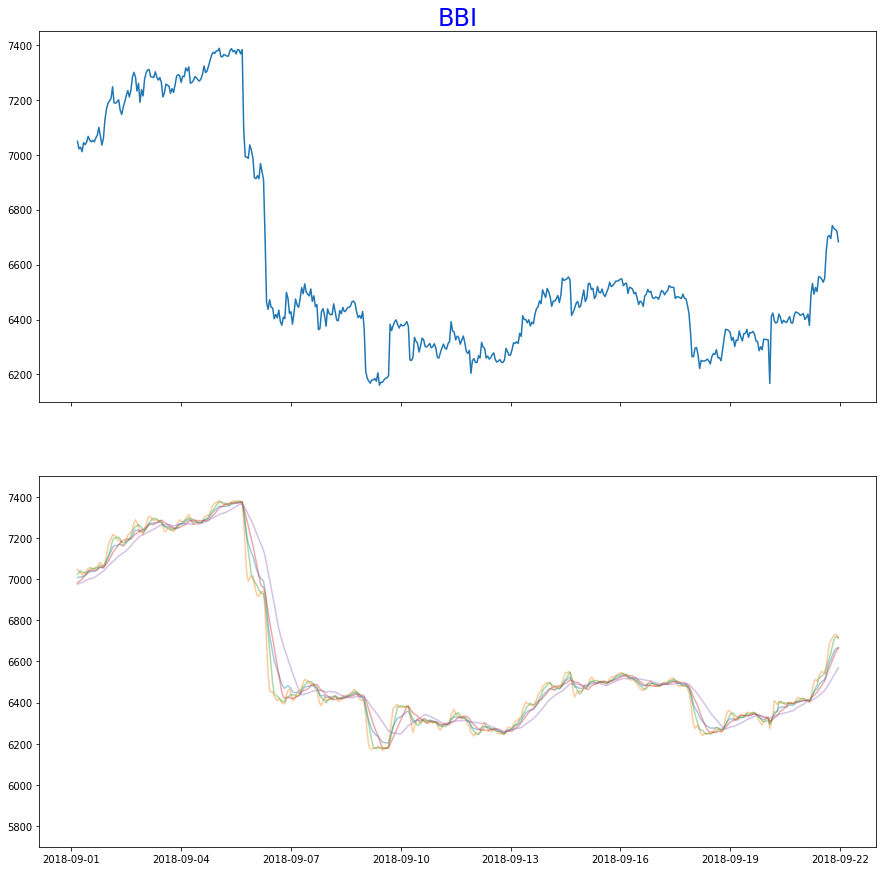

In [10]:
MA_3 = dv1h.get_ts('MA_3', date_type='datetime')
MA_6 = dv1h.get_ts('MA_6', date_type='datetime')
MA_12 = dv1h.get_ts('MA_12', date_type='datetime')
MA_24 = dv1h.get_ts('MA_24', date_type='datetime')
BBI = dv1h.get_ts('BBI', date_type='datetime')

Plot_Mean(dv1h, BBI.iloc[:,0],n=-500)

In [11]:
#因子一为BBI因子
#图像对比后发现BBI与价格走势呈正相关，且趋势几乎相同
#主要表现为走势相似，趋势相同

In [12]:
#选取KDJ作为第二因子指标

import warnings
warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time

#选取BTCUSDT：binance为数据对象，并添加freq参数
start = time()
path = r'C:\Users\风袖\Downloads\min_data\VnTrader_1Min_Db'
props = {'fields':'high,low,close,open,volume',
         'symbol': 'BTCUSDT:binance',
         'freq':'30min,1h',
         'start_date': 20180601000000}

Time_dict = ds.bar_reader(path, props)#读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()
dv1h.create_init_dv(Time_dict['1h'].dropna().set_index(["trade_date","symbol"]))
dv1h.get_ts('close',date_type = 'datetime').head()

import pandas as pd
import matplotlib.pyplot as plt

Initialize dataview success.


In [14]:
def Plot_Mean(dv, KDJ_K_A, KDJ_D_A, KDJ_J_A, chart_name='KDJ',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:], alpha=0.4)
    ax1.plot(KDJ_D_A.iloc[n:], alpha=0.4)
    ax1.plot(KDJ_J_A.iloc[n:], alpha=0.4)
    ax1.hlines(0, RSV.iloc[n:].index[0], RSV.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

def SMA(A,n,m):
        # 设置alpha的比例
        alpha = m/n
        #通过ewm计算递归函数
        return A.ewm(alpha=alpha, adjust=False).mean()
dv1h.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1h.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)

Field [RSV] is overwritten.
Field [KDJ_K_A] is overwritten.
Field [KDJ_D_A] is overwritten.
Field [KDJ_J_A] is overwritten.


symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,0.350145


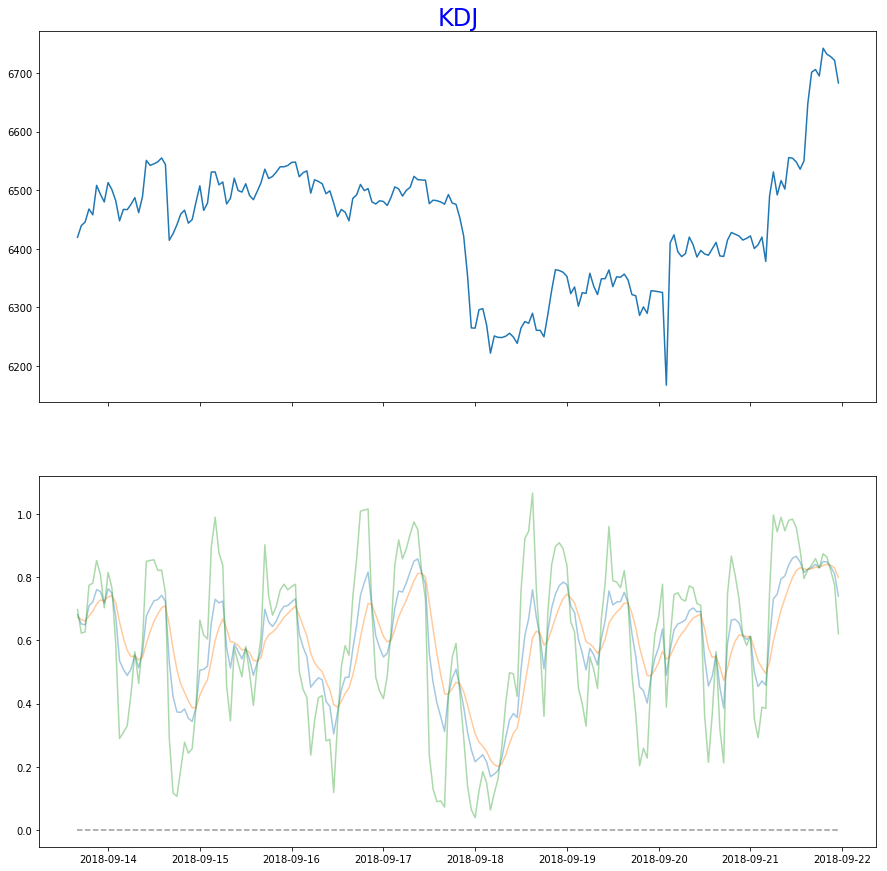

In [15]:
KDJ_K_A = dv1h.get_ts('KDJ_K_A', date_type='datetime')
KDJ_D_A = dv1h.get_ts('KDJ_D_A', date_type='datetime')
KDJ_J_A = dv1h.get_ts('KDJ_J_A', date_type='datetime')
RSV = dv1h.get_ts('RSV', date_type='datetime')

Plot_Mean(dv1h, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0], n=-200)

In [16]:
#KDJ指标长短线交叉时出现买入/卖出信号
#橘色短线由下向上穿过绿色长线时，卖出信号
#反之则为买入信号

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

#对于BBI指标来说：
#与价格走势相关

#进出场假设：
#当股价处于高位，收盘价由上向下跌破多空线时为卖出信号，
#当股价处于低位，收盘价由下向上突破多空线时为买入信号。

#对于KDJ来说：
#与价格相关，可以通过长短线交叉进行判断，定义买入卖出信号

#进出场假设：
#短线由下向上穿过长线，卖出信号
#长线由下向上穿过短线，买入信号